In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import tweepy
import json
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [5]:
df = pd.read_csv('archive_clean.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
Unnamed: 0               1994 non-null int64
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1448 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1

In [8]:
df.tweet_id = df.tweet_id.astype(str)
df.dog_stage = df.dog_stage.astype("category")
df.timestamp = pd.to_datetime(df.timestamp)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
Unnamed: 0               1994 non-null int64
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1448 non-null object
dog_stage                326 non-null category
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2        

In [10]:
df.retweet_count.describe()

count     1994.000000
mean      2762.679037
std       4732.483030
min         14.000000
25%        621.000000
50%       1342.000000
75%       3188.750000
max      78839.000000
Name: retweet_count, dtype: float64

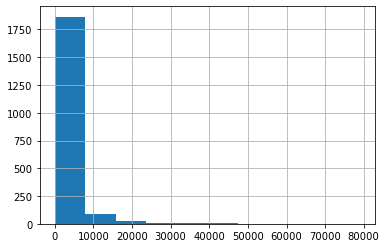

In [11]:
df.retweet_count.hist();

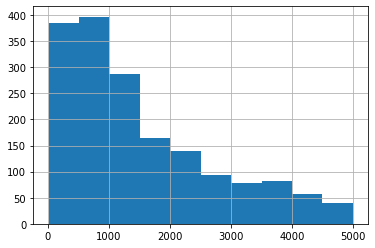

In [12]:
df[df.retweet_count <= 5000].retweet_count.hist();

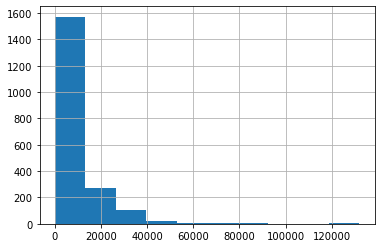

In [13]:
df.favorite_count.hist()

In [14]:
df.favorite_count.describe()

count      1994.000000
mean       8912.370612
std       12442.768857
min          81.000000
25%        1967.500000
50%        4109.000000
75%       11250.000000
max      131922.000000
Name: favorite_count, dtype: float64

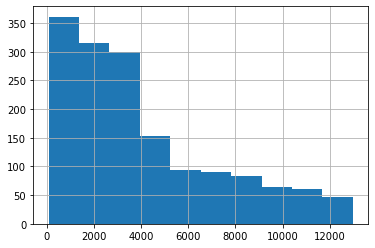

In [15]:
df[df.favorite_count <= 13000].favorite_count.hist()

In [16]:
# Most popular names
df.name.value_counts().head(10)

a          55
Charlie    11
Cooper     10
Lucy       10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
the         7
Name: name, dtype: int64

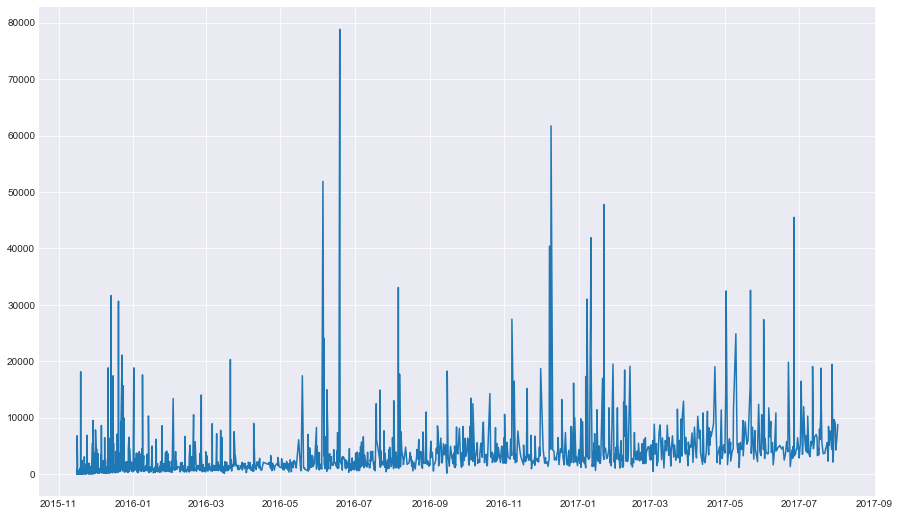

In [23]:
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(df.timestamp, df.retweet_count);


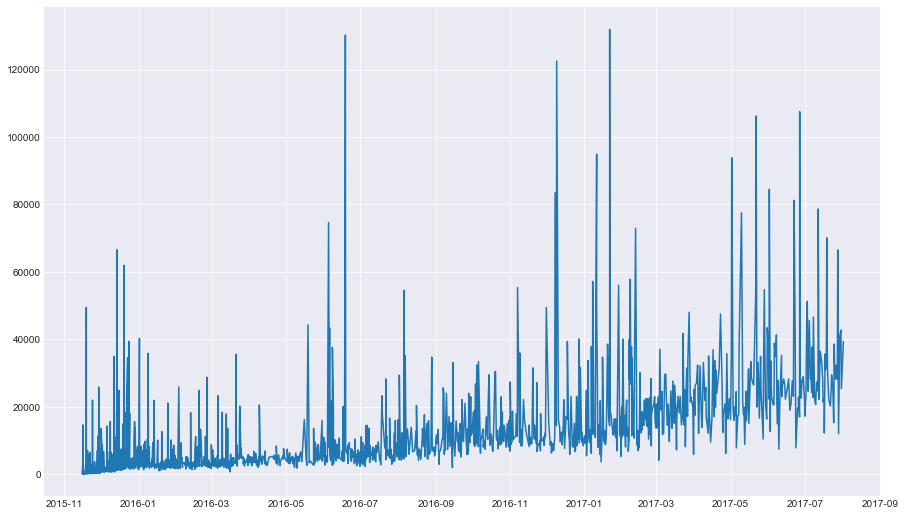

In [25]:
plt.subplots(figsize=(15, 9))
plt.plot(df.timestamp, df.favorite_count);

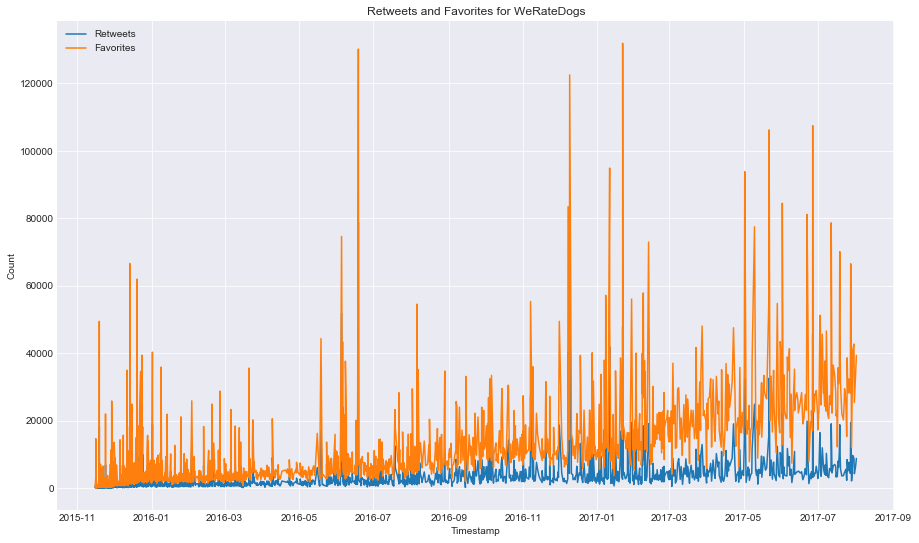

In [32]:
plt.subplots(figsize=(15, 9))
plt.plot(df.timestamp, df.retweet_count, label='Retweets')
plt.plot(df.timestamp, df.favorite_count, label='Favorites')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Retweets and Favorites for WeRateDogs')
plt.savefig('retweets_favorites.png');

In [33]:
dog_counts = df.groupby('dog_stage')['tweet_id'].count()
dog_counts

dog_stage
doggo       72
floofer      3
pupper     223
puppo       28
Name: tweet_id, dtype: int64

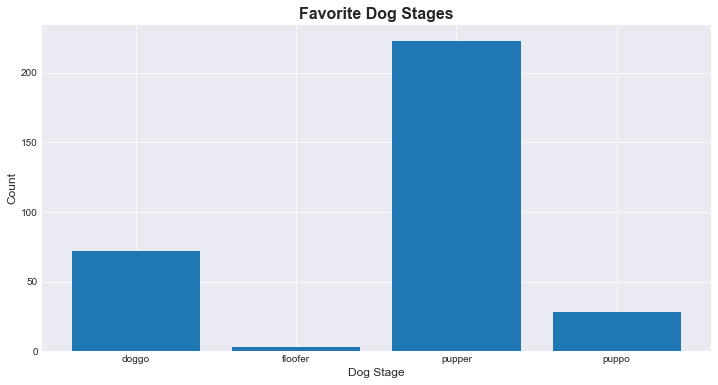

In [34]:
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4], dog_counts, tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Favorite Dog Stages', fontsize=16, weight='bold')
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Count', fontsize=12);
plt.savefig('favorite-dogs.png')